In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_science_job.csv')

In [4]:
df.sample(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
14608,19898,city_114,0.926,Male,No relevent experience,Full time course,Masters,STEM,17.0,1000-4999,NGO,62.0,0.0
13331,13535,city_73,0.754,Male,Has relevent experience,Part time course,Graduate,STEM,10.0,NaN,NaN,8.0,0.0
910,5989,city_162,0.767,NaN,No relevent experience,Full time course,Primary School,NaN,3.0,NaN,NaN,50.0,1.0


In [6]:
df.shape

(19158, 13)

In [10]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [11]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [13]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
9153,0.884,no_enrollment,Graduate,15.0,82.0
13006,0.624,Full time course,Graduate,8.0,31.0
10162,0.762,no_enrollment,Masters,10.0,122.0
16218,0.920,no_enrollment,Masters,20.0,108.0
4244,0.743,no_enrollment,Graduate,7.0,166.0


In [14]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [15]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [16]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

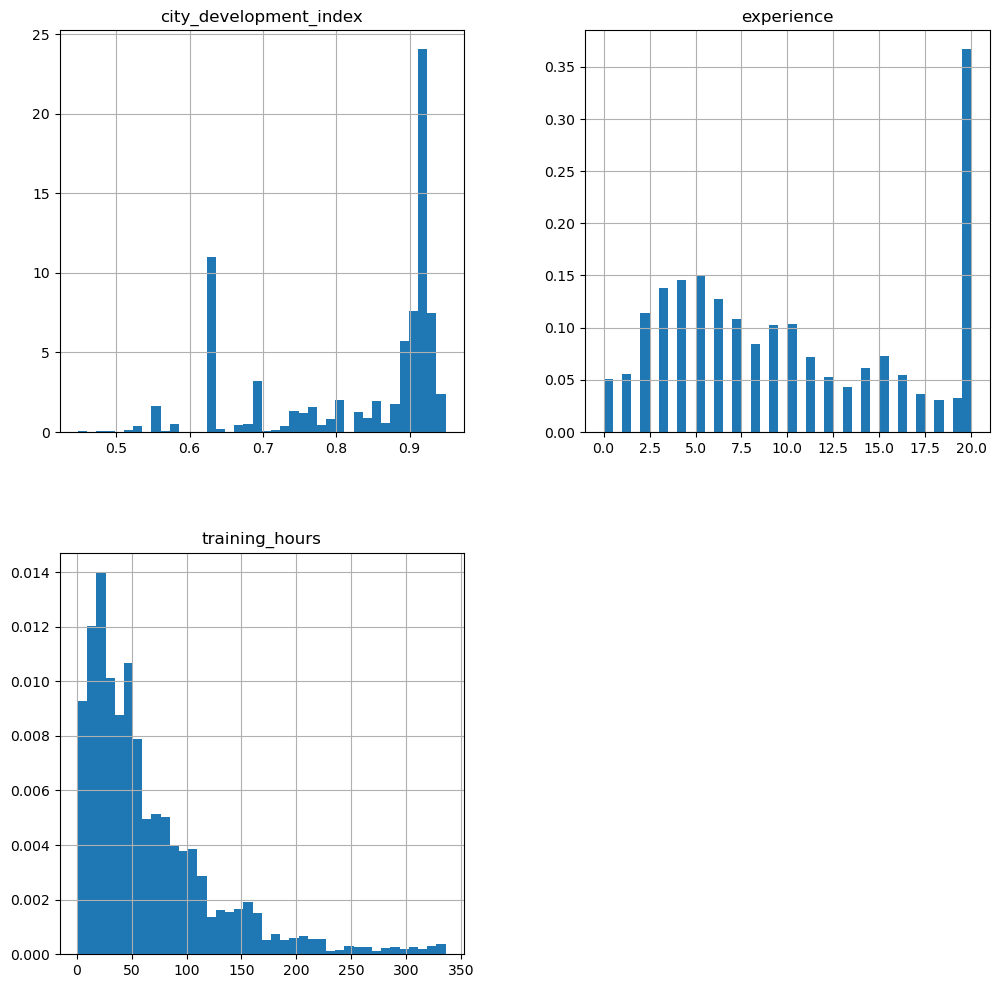

In [21]:
new_df.hist(bins = 40,density = True , figsize = (12,12))
plt.show()

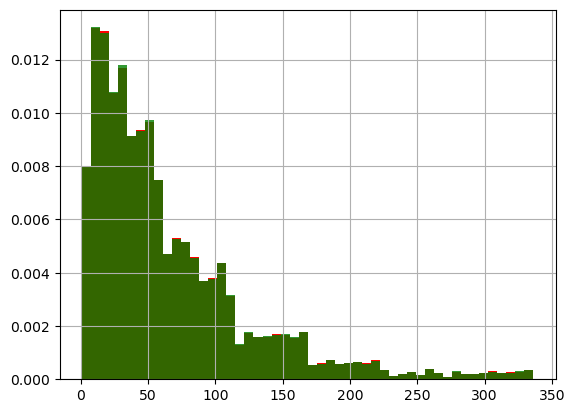

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

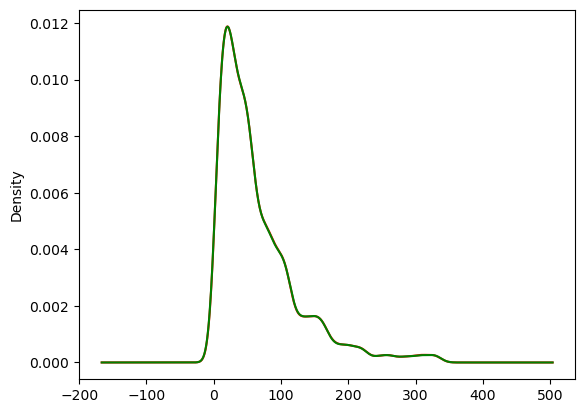

In [28]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')
plt.show()

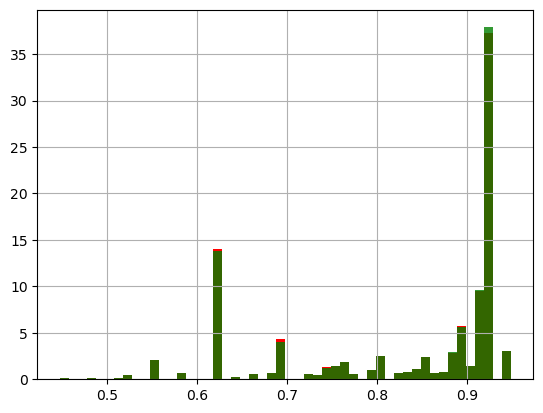

In [29]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

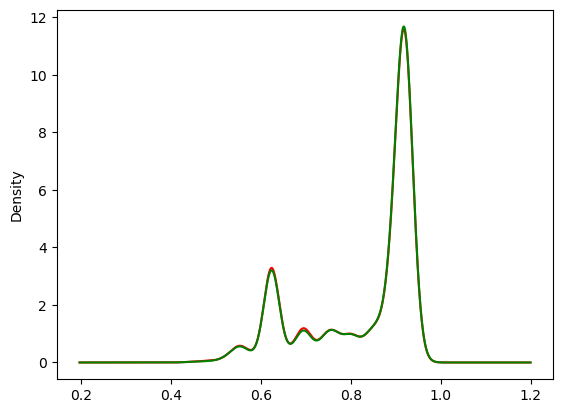

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')
plt.show()

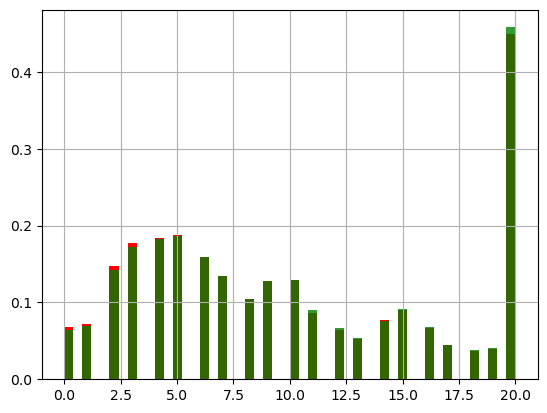

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)
plt.show()

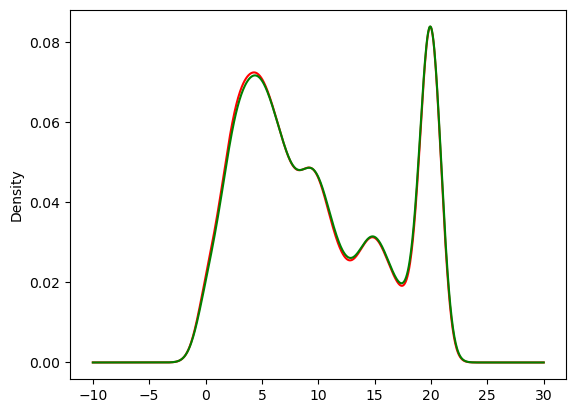

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')
plt.show()

In [34]:
temp = pd.concat([
           # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
],
axis = 1 )

# add column name 
temp.columns= ['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
